# 1. Import, Tidy, and Explore Tabular Data in Python with Pandas

Welcome! In this lesson, you'll get a crash course in bringing your tabular research data into Python. 

We will introduce **pandas**, a key tool in the Python ecosystem, along with **NumPy** which is the powerful framework underlying pandas and **matplotlib**, a visualization library already integrated into pandas. (We'll use the **seaborn** visualization library briefly too). Throughout this notebook, we will focus on how to leverage Python tools to think critically about your data. 

At the end, you'll have written a data science recipe you can bring to future datasets and research questions.

In [89]:
from IPython.display import Image

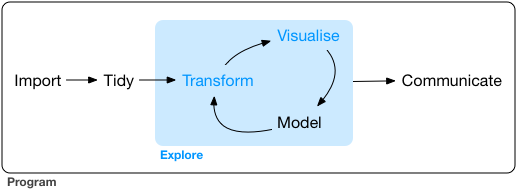

In [90]:
Image('https://d33wubrfki0l68.cloudfront.net/795c039ba2520455d833b4034befc8cf360a70ba/558a5/diagrams/data-science-explore.png')

*The exploratory data analysis cycle (Grolemund and Wickham, 2017)*

If you take a look at the exploratory data cycle above, this session will focus on the **import**, **tidy**, **transform**, and **visualize** steps. (If you're coming from the R world, you may recognize this model from Hadley Wickham's unmissable [R for Data Science](https://r4ds.had.co.nz/)!

But first, let's start with our research questions.

## Case study: Breast Cancer Dianostic Dataset

What does it take to produce good, reliable diagnoses? Clinicians need to use information strategically to determine the best plan of care. Researchers may wish to improve clinician training, invent automated systems that support patient-facing staff, or identify pathways for future investigations into the etiology of disease.

When exploring a new dataset, it's important to understand and clearly articulate research questions. 

Let's suppose we are researchers at Big University Oncology Institute working with fine needle aspirate (FNA) images of breast masses. Our long-term goal is to increase the efficacy of distinguishing malignant from non-malignant masses from FNA digital images. As one part of that research, we are interested in whether patterns exist in imaging data that would improve the ability of clinicians to correctly dinstinguish malignant and non-malignant tumors.

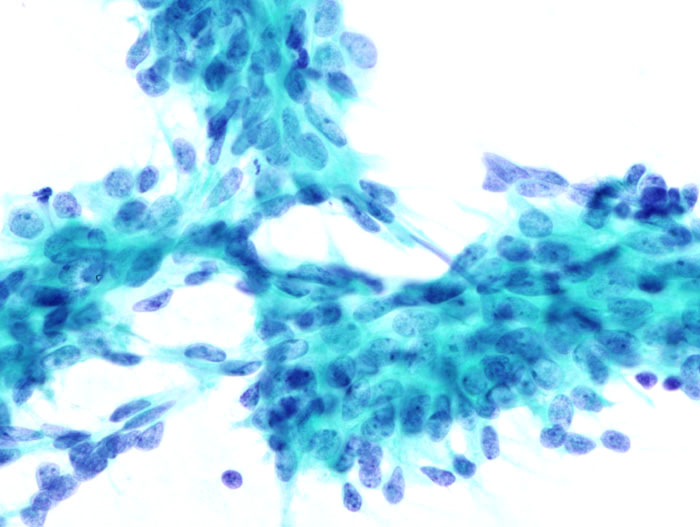

In [91]:
Image('https://upload.wikimedia.org/wikipedia/commons/8/8b/Breast_fibroadenoma_by_fine_needle_aspiration_%282%29_PAP_stain.jpg', width = 600)

*Fine needle aspiration of fibroadenoma, a type of benign breast tumor. (Source: Wikimedia)*

Today, we'll be using the **Wisconsin Diagnostic Breast Cancer (WDBC) dataset**. This data was initially captured in eight groups from January 1989 to November 1991 by Dr. William H. Wolberg at the University of Wisconsin Hospitals, Madison. Dr. Wolberg subsequently donated the dataset to the University of California-Irvine's Machine Learning Repository, where it has been used in dozens of subsequent articles and further annalyzed and transformed.

The [original repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+\(Diagnostic\)) contains several versions of the breast cancer data. For today we're interested in Dr. Wolberg's original encodings of the FNA image data, which uses a ranking of 1 to 10 to describe a variety of attributes such unifority of cell shape and size, mitoses and normal nuclei count, margin adhesion, clump thickness, and so on.

Given our research questions, how might we wish to explore a dataset where observations correspond to fine needle aspiration (FNA) images of breast growths? What's important to us?

(**Edit this box to include a question you would like to investigate in this data.**)



For this dataset, we have access to two files: 

1. the dataset, represented as a comma-separated value (CSV) file, and 
2. a plain-text readme file describing the dataset. 

I'll include relevant excerpts of the readme file as we go, but you can read the full readme in the Appendix below.

## Bringing your data into a pandas dataframe

Let's get started. First, let's import the pandas and numpy library:

In [92]:
import pandas as pd
import numpy as np

Python likes to think in terms of objects. So when we bring the functionality of pandas into our Notebook, we will find ourselves constantly accessing functionality of the pandas library via code like pandas.DataFrame or pandas.readcsv(). To make our collective lives easier, there is a convention of assigning pandas the alias pd. (And then let's do the same thing for numpy)

Python includes several ways to import CSV data. In this case, we want to bring our data into a special pandas data structure called a **DataFrame**. DataFrames are similar to tables, in that they store a collection of observations with regular sets of attributes. But in pandas, they have special functionality and are optimized for extremely quick access.

To create a DataFrame from existing tabular data, we only one line of code with the following parts:

1. A variable to assign the outcome of our pandas function (in this case, a DataFrame).
2. A call to the appropriate CSV reading method of pandas, and
3. Passing in the location (or filename) of our CSV file as a parameter.

For this example, our csv data is located in this same directory as **wisconsin_data.csv**. Run the code block below to generate a DataFrame and assign it to the variable **diagnostic_data**:

In [93]:
# Replace ??? with appropriate filename
diagnostic_data = pd.read_csv('wisconsin_data.csv')

We've created a new DataFrame object - remember, everything in Python is an object! - consisting of data from our diagnostic_data table.

In pandas, a DataFrame is a data type that allows us to use special functions. When a function is relative to an object, we call it a **method** and access it with a period at the end of the object. So, for example, print is a standalone function:

```
print("Hello world")
```

But .head() is a pandas **method** that must be called on a pandas DataFrame:

```
diagnostic_data.head()
```

.head() usefully shows us the first several rows in our DataFrame along with row and column labels. Let's try it below, passing in `20` to show the first 20 rows:

In [94]:
diagnostic_data.head(20)

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,2,1,2,1,2,1,3,1,1,2
7,1033078,2,1,1,1,2,1,1,1,5,2
8,1033078,4,2,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


Oh no! Take a look at the header line. What do you think is going on here?

pandas makes certain assumptions by default when loading in data. In this case, pandas assumed that the top row of our data contains a header. In fact, our data is missing a header! Let's fix this.

First, let's redo our earlier read_csv() method call. We want to pass in two parameters:

* Our filename is "wisconsin_data.csv". We need to put this parameter first, but it doesn't need a name.
* We need to pass in the "header" parameter as **None**. (None doesn't need quotation marks).

In [95]:
# add both parameters to .read_csv()
diagnostic_data = pd.read_csv("wisconsin_data.csv", header=None)

Now let's take a look:

In [96]:
diagnostic_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Okay, halfway there! We can use the DataFrame as is, but it will be frustrating not to rely on actual column names. We need to dig into the data documentation itself to figure out the best labels in this case. 

Here's the relevant part of our data readme:

```
7. Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```

To assign a header to a DataFrame without column labels (or to replace existing Column labels), we can use a list of strings.

Note that it's a good practice to write our column labels without any spaces. This lets us access columns more flexibly later on (for instance, to extract just "column A" `data_frame.column A` won't work, but `data_frame['column A']` will work. In contrast, both `data_frame.col_a` and `data_frame['col_a']` will work as expected.

ALSO, note that in many programming languages, "class" is a **protected** term. That means it can cause unexpected behavior as a string because Python may assume you're referencing the programmatic term "class". It's a good practice to rename 'class' to something else, in case we want to use the notation style `data_frame.class` in the future.

Run the code below to generate a list of strings and assign them as labels to the diagnostic_data DataFrame:

In [97]:
attribute_labels = ['sample_code', 
                    'clump_thickness', 
                    'uniformity_cell_shape', 
                    'uniformity_cell_size',
                    'marginal_adhesion',
                    'single_epi_cell_size',
                    'bare_nuclei',
                    'bland_chrom',
                    'norm_nuclei',
                    'mitoses',
                    'malignant'
                   ]

diagnostic_data.columns = attribute_labels

In [98]:
diagnostic_data.head()

,sample_code,clump_thickness,uniformity_cell_shape,uniformity_cell_size,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chrom,norm_nuclei,mitoses,malignant
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


You should see a nicely labeled table output to the Notebook above. Congrats! Your data is definitively imported into a DataFrame.

Note that pandas will create an index and assign ordered values beginning at 0 by default. You can override this behavior (as in, you could set sample_code as the index) but it's helpful to have this index in place for future use, e.g. if we wanted to reverse the order of our data and sample_code wasn't sequential. [Here is a helpful resource](https://t.co/swUeOFoc33?amp=1) for learning more about index behavior in pandas.

## Tidying data

You have likely encountered data that is unwieldly, unreliable, and not ready for analysis. (Some of this might be your own research data!) 

If we think of this difficult data as **messy data**, we might assume that tidy data is the opposite: usable, reliable, and ready for analysis. This is certainly the desired outcome of tidying data. However, **tidy data** also refers to a specific paradigm of structuring tabular data, put forward by Hadley Wickham in 2013. 

For us to consider a dataset a tidy dataset, it must follow three principles (Wickham, 2013):

> 1. Each variable forms a column.
> 2. Each observation forms a row.
> 3. Each type of observational unit forms a table

We can also express this visually:

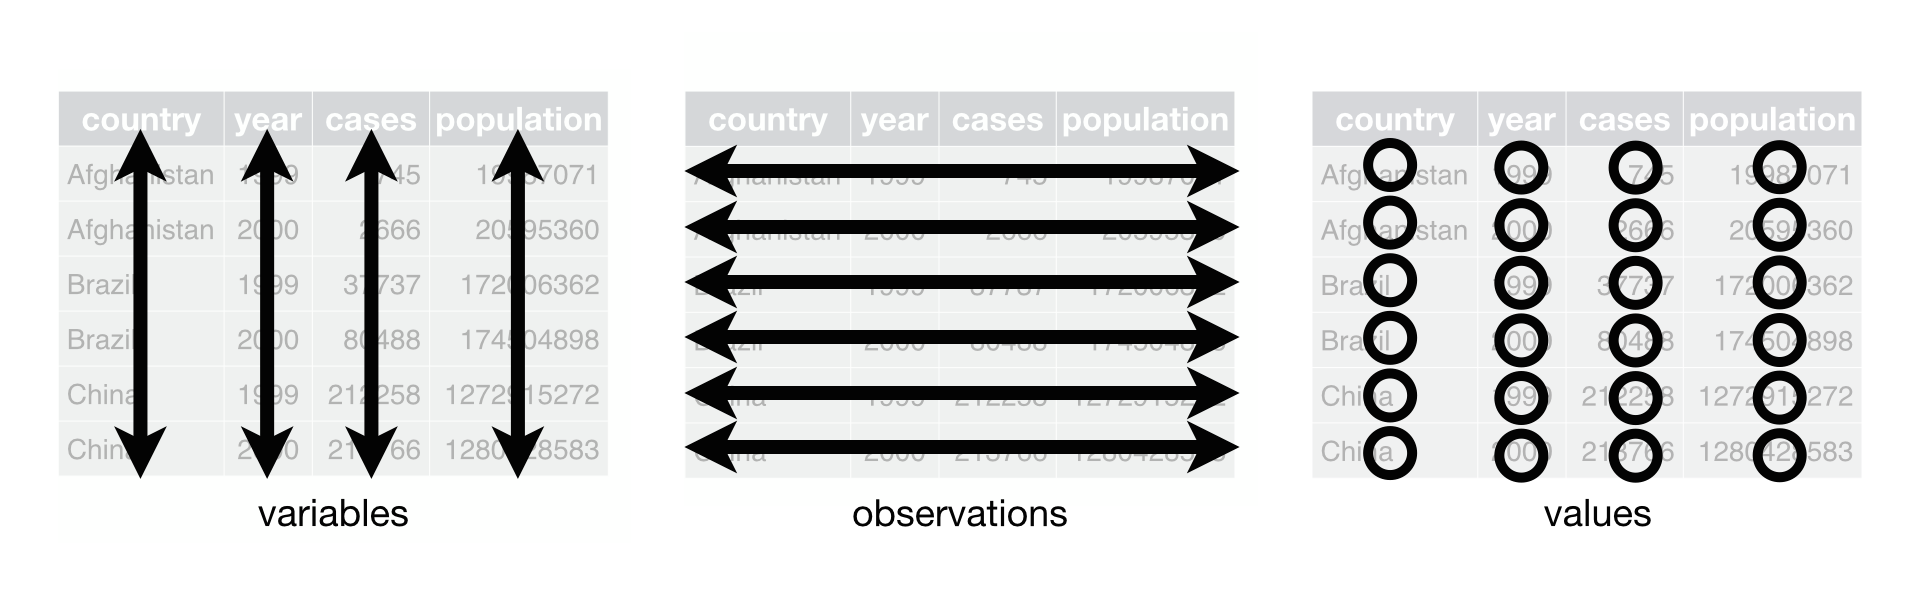

In [99]:
Image('https://d33wubrfki0l68.cloudfront.net/6f1ddb544fc5c69a2478e444ab8112fb0eea23f8/91adc/images/tidy-1.png', width=800)

(Source: ["12. Tidy Data"](https://r4ds.had.co.nz/tidy-data.html), *R for Data Science*. Wickham and Grolemund, 2017)

We've already made one significant change to make our DataFrame **tidy** - manually declaring a header! If we leave the distinction between header and first row ambiguous, we lose the integrity of the tidy data structure where each row corresponds to an observation, and *only* an observation.

Another concern is empty, missing, or **null values**. 

If the null value "belongs" to an observation, in that the value was in fact the varaible recorded for that observation, then this is completely acceptable and we must simply use a reliable way to encode this null value. If the null value is, instead, the product of missing, damaged, or incomplete data, then we may wish to treat that null differently (such as use it for evidence for excluding this observation, if experimentally appropriate).

### Hunting for nulls

Here, it is important to remember that pandas is built on top of NumPy, a powerful numeric computing package that relies upon the highly-optimized NumPy array data structure for things like vector math. NumPy only has native support for null values in floating-point numbers. For all other data types, including integers and strings, pandas has filled in the gaps, and it can be clunky at times.

The key takeaway: do not assume nulls behave the way you expect them to in pandas, and always check data types!

Consider the following example. To check for null values in our diagnostic data, we may wish to use the following syntax: `diagnostic_data.isnull().any()`. What this does:

* 'diagnostic_data' is our DataFrame of FNA image data observations
* `.isnull()` is a method that returns True or False if a null value is found, per value in our dataframe
* `.any()` looks for a single True value in any column and returns the outcome.

Let's look at the result:

In [100]:
diagnostic_data.isnull().any()

sample_code              False
clump_thickness          False
uniformity_cell_shape    False
uniformity_cell_size     False
marginal_adhesion        False
single_epi_cell_size     False
bare_nuclei              False
bland_chrom              False
norm_nuclei              False
mitoses                  False
malignant                False
dtype: bool

Looks good, right? I noticed that we had forgotten to check our data types beforehand. Let's do that now.

In [101]:
diagnostic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
sample_code              699 non-null int64
clump_thickness          699 non-null int64
uniformity_cell_shape    699 non-null int64
uniformity_cell_size     699 non-null int64
marginal_adhesion        699 non-null int64
single_epi_cell_size     699 non-null int64
bare_nuclei              699 non-null object
bland_chrom              699 non-null int64
norm_nuclei              699 non-null int64
mitoses                  699 non-null int64
malignant                699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


The `.info()` method reiterates what we saw before: a complete set of non-null values per column **CHECKCHECK** but we also learn the datatype that pandas assigned each column at the `read_csv()` step. Most columns are **int64**, which is a 64-bit integer and wholly appropriate for our data. However, bare_nuclei is an object! 

By default, pandas converts alphanumeric or what Python considers "string" data into object format on importing. This means there is likely some non-numeric data in our bare_nuclei column. Let's look at all unique values in this column to investigate.

The `.unique()` method can be used on a DataFrame column to show all unique values. For instance, if we want to see all of the unique values for mitoses, we could run the following:

In [102]:
diagnostic_data.mitoses.unique()

array([ 1,  5,  4,  2,  3,  7, 10,  8,  6])

Let's look at bare_nuclei. Write and run the code below:

In [103]:
# Write code below that calls the unique method on the column we are investigating:

# Your code here

Ahh! It appears that some values contain a question mark instead of an integer. To chck how prevelant this ? is in our data, let's replace the `.unique()` method call with `.value_counts()`, which provides counts for each unique value.

In [104]:
# Write code below that generates counts for each unique value in the column we are investigating.

So this occurs in 16 of our observations. If we reference the data documentation, we'll see that this was foregrounded for us ahead of time (but the documentation did not specify in which column the missing attribute values occur!)


```

8. Missing attribute values: 16

   There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?".  

```
One important takeaway: **always read the data documentation!!!**

So how do we deal with these nulls, and also go back to treating `bare_nuclei` values as numeric? Our best option in pandas is generally to use the NumPy NaN or null-value approach. 

This is subject to an important limitation: if we wish to use nulls alongside numeric data, np.NaN values **must** be floating-point. Integer won't cut it in this case. We could, alternatively, decide our data is of 'object' type which can handle a wide variety of possibilities, but then we would lose some functionality later on w/r/t histograms and correlation plots.

Luckily, we only need to use two methods to create our desired numeric data with nulls:

* `.replace()` to convert all question marks with a NumPy NaN object
* `.astype()` which will allow us to coerce eligible data to floating point numeric, or 'float64'

In [105]:
diagnostic_data.bare_nuclei = diagnostic_data.bare_nuclei.replace('?', np.nan)
diagnostic_data.bare_nuclei = diagnostic_data.bare_nuclei.astype('float64')

Let's check to see if our DataFrame now includes nulls that pandas can recognize, and also stores bare-nuclei in the correct data type:

In [106]:
diagnostic_data.bare_nuclei.isnull().any()

True

In [107]:
diagnostic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
sample_code              699 non-null int64
clump_thickness          699 non-null int64
uniformity_cell_shape    699 non-null int64
uniformity_cell_size     699 non-null int64
marginal_adhesion        699 non-null int64
single_epi_cell_size     699 non-null int64
bare_nuclei              683 non-null float64
bland_chrom              699 non-null int64
norm_nuclei              699 non-null int64
mitoses                  699 non-null int64
malignant                699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


## The core data exploration cycle: transforming and visualizing

Earlier, we had described our research question as follows:

> ...we are interested in whether patterns exist in imaging data that would improve the ability of clinicians to correctly dinstinguish malignant and non-malignant tumors.

Let's break this goal into some specific tasks. To learn more, we may wish to learn:
1. The overall size, shape, and scope of our FNA imaging data.
2. Summary statistics and distributions for each image attribute.
3. Possible correlations between image attributes.

And, in the future, to pursue:
4. Avenues for subsequent analysis (e.g. designing a machine learning classification task)

Now that we've brought our data into the DataFrame structure, we have access to an array of methods and tools to accomplish these tasks. Let's explore each below.

### 1. Overall size, shape, and scope of our FNA imaging data.

When getting oriented to a new dataset, I like to see a few examples of observations, and also make sure the data is in a format I expect.

We've already seen `.head()` and `.info()`. Let's also add in `.tail()`, which just shows the bottom 5 items. We can also pass in a parameter to see the nth rows from the bottom.

In [108]:
diagnostic_data.head()

,sample_code,clump_thickness,uniformity_cell_shape,uniformity_cell_size,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chrom,norm_nuclei,mitoses,malignant
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [109]:
diagnostic_data.tail(10)

,sample_code,clump_thickness,uniformity_cell_shape,uniformity_cell_size,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chrom,norm_nuclei,mitoses,malignant
689,654546,1,1,1,1,2,1.0,1,1,8,2
690,654546,1,1,1,3,2,1.0,1,1,1,2
691,695091,5,10,10,5,4,5.0,4,4,1,4
692,714039,3,1,1,1,2,1.0,1,1,1,2
693,763235,3,1,1,1,2,1.0,2,1,2,2
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4
698,897471,4,8,8,5,4,5.0,10,4,1,4


In [110]:
diagnostic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
sample_code              699 non-null int64
clump_thickness          699 non-null int64
uniformity_cell_shape    699 non-null int64
uniformity_cell_size     699 non-null int64
marginal_adhesion        699 non-null int64
single_epi_cell_size     699 non-null int64
bare_nuclei              683 non-null float64
bland_chrom              699 non-null int64
norm_nuclei              699 non-null int64
mitoses                  699 non-null int64
malignant                699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


If you want to quickly view the overall dimensions of your DataFrame, the most concise way is to use .shape . Unlike .head(), which is a **method** (or function that belongs to our DataFrame object), .shape is an **atribute** meaning that it returns some data about the object. 

The reason this matters is that .head() always takes parentheses at the end, and .shape never takes paranetheses.

Run the code below to see this in action.

In [111]:
diagnostic_data.shape

(699, 11)

In contrast, writing `.shape` with paranetheses will produce a TypeError:

In [112]:
diagnostic_data.shape()

TypeError: 'tuple' object is not callable

That's it for now!

### 2. Summary statistics and distributions for each image attribute.

We now have a big-picture view of how our dataframe is organized, but we don't yet know much about the individual columns. What is the distribution of values within a given column? How do they compare to one another?

Fortunately, column-level analysis is where the NumPy-powered architecture of pandas really shines. Let's take some time exploring columns individually and comparing them to one another.

First, run the `.columns` attribute call on our dataframe to remind us of all available columns:

In [113]:
# replace with your code
diagnostic_data.columns

Index(['sample_code', 'clump_thickness', 'uniformity_cell_shape',
       'uniformity_cell_size', 'marginal_adhesion', 'single_epi_cell_size',
       'bare_nuclei', 'bland_chrom', 'norm_nuclei', 'mitoses', 'malignant'],
      dtype='object')

Now, let's get a visual sense of the distirbution of values within each column. Pandas supports visualization using the matplotlib library natively, which is very helpful for our purposes. To make this work within a notebook, we simply need to import matplotlib, and then specify that we want to see inline visualizations with a "magic command" (the magic command is specific to Jupyter Notebooks):

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt

We can generate side-by-side histograms of all our columns by calling the `.hist()` method on our DataFrame. It's not necessary to specify paramters, but for readability, it's helpful to set the `figsize` parameter to an `(x, y)` tuple, in inches:

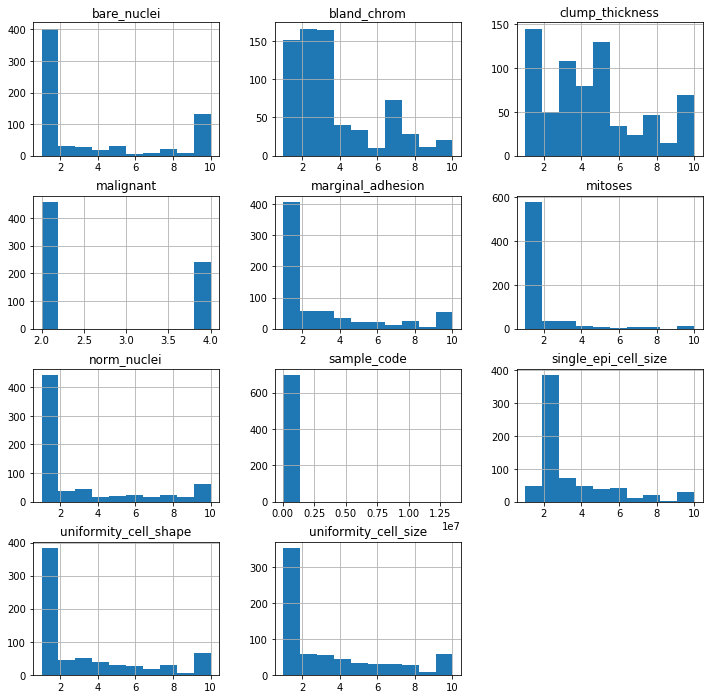

In [115]:
our_plot = diagnostic_data.hist(figsize=(12,12))

We can pair this code with the column select syntax `DataFrame[["Column A", "Column B"...]]` to compare just a subset of columns. Unlike the dot format of referencing a column (which is my favorite for most situations), the bracket format allows you to pass in a list of columns, which is helpful for subsetting. If you write code this way, note that you need two brackets, and the column names must now be passed in as strings (and thus must be surrounded by quotation marks). 

Run the example below and please experiment with your own code afterwards:


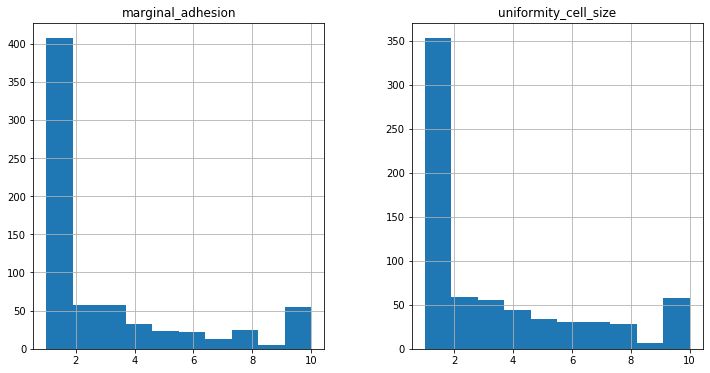

In [116]:
comparison_plot = diagnostic_data[["marginal_adhesion","uniformity_cell_size"]].hist(figsize=(12,6))

In [117]:
## Add your own code to compare the distribution of two other variables here!

Now let's use the `.describe()` method specifically on a column to get summary statistics. For instance, here is the summary statistics on the `clump_thickness` column:

In [118]:
diagnostic_data['clump_thickness'].describe()

count    699.000000
mean       4.417740
std        2.815741
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: clump_thickness, dtype: float64

You can also write this method call using the bracket notation for referencing a column:

In [119]:
# add your own code to view a column's summary statistics, or to compare multiple columns of interest

### 3. Possible correlations between image attributes.

Let's visualize correlations!

In [120]:
diagnostic_data.corr()

,sample_code,clump_thickness,uniformity_cell_shape,uniformity_cell_size,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chrom,norm_nuclei,mitoses,malignant
sample_code,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.099248,-0.060051,-0.052072,-0.034901,-0.080226
clump_thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.593091,0.558428,0.535835,0.350034,0.716001
uniformity_cell_shape,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.691709,0.755721,0.722865,0.458693,0.817904
uniformity_cell_size,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.713878,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.670648,0.666715,0.603352,0.417633,0.696800
single_epi_cell_size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.585716,0.616102,0.628881,0.479101,0.682785
bare_nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
bland_chrom,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.680615,1.000000,0.665878,0.344169,0.756616
norm_nuclei,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.584280,0.665878,1.000000,0.428336,0.712244
mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.339210,0.344169,0.428336,1.000000,0.423170


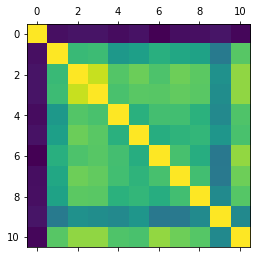

In [121]:
plt.matshow(diagnostic_data.corr())
plt.show()

In [122]:
import seaborn as sns

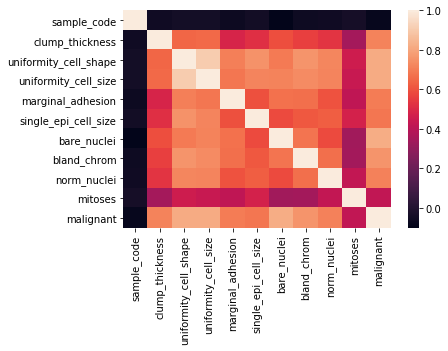

In [123]:
corr = diagnostic_data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Let's run the analysis again after dropping our primary key (sample_code) and predictor class variable (malignant). You can drop a column using the `.drop()` method, which requires two parameters:

* the name of our column (don't need to specify a parameter), which we can pass in as a list of multiple items
* an axis value (1 for columns)

Like so: `our_new_data_frame = our_old_data_frame.drop(["primary_key_column", "predictor_column"], axis=1)`


Drop the outcome class column `malignant` from our DataFrame and assign the output to a new DataFrame called `diagnostic_predictors'

In [124]:
# add your code for a new diagnostic_predicotrs DataFrame

In [125]:
# generate a new correlation heatmap based on the new dataframe

In [126]:
diagnostic_data.malignant = diagnostic_data.malignant.astype('category')
diagnostic_data = pd.get_dummies(diagnostic_data, prefix = "malignant", columns = ['malignant'])
diagnostic_data = diagnostic_data.rename(columns={"malignant_2": "is_benign", "malignant_4": "is_malignant"})

In [127]:
corr_cleaned = diagnostic_data.drop(["sample_code"], axis=1)

In [128]:
corr_cleaned.corr()

,clump_thickness,uniformity_cell_shape,uniformity_cell_size,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chrom,norm_nuclei,mitoses,is_benign,is_malignant
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.593091,0.558428,0.535835,0.350034,-0.716001,0.716001
uniformity_cell_shape,0.644913,1.000000,0.906882,0.705582,0.751799,0.691709,0.755721,0.722865,0.458693,-0.817904,0.817904
uniformity_cell_size,0.654589,0.906882,1.000000,0.683079,0.719668,0.713878,0.735948,0.719446,0.438911,-0.818934,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.670648,0.666715,0.603352,0.417633,-0.696800,0.696800
single_epi_cell_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.585716,0.616102,0.628881,0.479101,-0.682785,0.682785
bare_nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,-0.822696,0.822696
bland_chrom,0.558428,0.755721,0.735948,0.666715,0.616102,0.680615,1.000000,0.665878,0.344169,-0.756616,0.756616
norm_nuclei,0.535835,0.722865,0.719446,0.603352,0.628881,0.584280,0.665878,1.000000,0.428336,-0.712244,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.339210,0.344169,0.428336,1.000000,-0.423170,0.423170
is_benign,-0.716001,-0.817904,-0.818934,-0.696800,-0.682785,-0.822696,-0.756616,-0.712244,-0.423170,1.000000,-1.000000


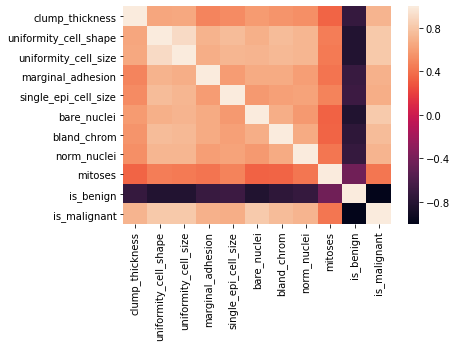

In [129]:
corr = corr_cleaned.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

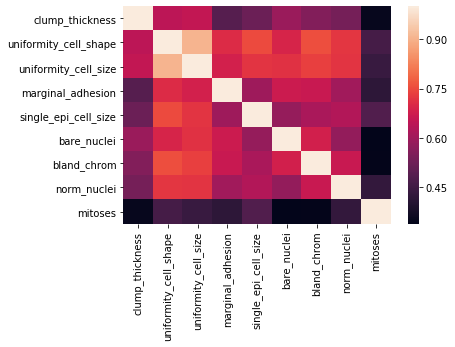

In [131]:
predictors_only = corr_cleaned.drop(['is_benign', 'is_malignant'], axis=1).corr()
sns.heatmap(predictors_only, 
        xticklabels=predictors_only.columns,
        yticklabels=predictors_only.columns)

## Where to go from here

We've tidied up our dataset, including dealing with headers and nulls; glimpsed the design, shape, and typical observations within our datset; explored summary statistics and distributions of values within columns; and evaluated covariance between columns with correlation plots and heat maps. 

Each of these tasks are valuable in their own right, no matter what analytical method we wish to pursue next. 

### 4. Avenues for subsequent analysis (e.g. designing a machine learning classification task)

The data work you've done in pandas is *particularly* relevant if we plan to approach this research question

> we are interested in whether patterns exist in imaging data that would improve the ability of clinicians to correctly dinstinguish malignant and non-malignant tumors

as the classification task

> Given the output class of "malignant" or "benign" in our observations, can we generate an accurate and reliable prediction from observations about Fine Needle Aspiration images (also contained within our observations)? If so, what variables are singificant in predicting an outcome class effectively? Among those important predictors, how would a change in measurement value influence the likely outcome, and how confident are we in that influence?

Now that we have our data in a tidy dataframe, those observations include a outcome class variable as well as several storng candidate for predictor variables. This is an excellent task to pursue via the supervised machine learning method of [binary classification](https://www.sciencedirect.com/topics/computer-science/binary-classification).

In the Python ecosystem, most if not all popular machine learning packages will work natively with pandas DataFrames. Look out for a future lesson using random forest classifers with scikit-learn on this very dataset you have prepared!

Let's save our work.

In [132]:
diagnostic_data.to_csv("wisconsin_data_clean.csv")

## Works cited & further reading

## Appendix: Full readme file

Full readme file accompanying data:

```
Citation Request:
   This breast cancer databases was obtained from the University of Wisconsin
   Hospitals, Madison from Dr. William H. Wolberg.  If you publish results
   when using this database, then please include this information in your
   acknowledgements.  Also, please cite one or more of:

   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 1990, pp 22-30.

   4. K. P. Bennett & O. L. Mangasarian: "Robust linear programming 
      discrimination of two linearly inseparable sets", Optimization Methods
      and Software 1, 1992, 23-34 (Gordon & Breach Science Publishers).

1. Title: Wisconsin Breast Cancer Database (January 8, 1991)

2. Sources:
   -- Dr. WIlliam H. Wolberg (physician)
      University of Wisconsin Hospitals
      Madison, Wisconsin
      USA
   -- Donor: Olvi Mangasarian (mangasarian@cs.wisc.edu)
      Received by David W. Aha (aha@cs.jhu.edu)
   -- Date: 15 July 1992

3. Past Usage:

   Attributes 2 through 10 have been used to represent instances.
   Each instance has one of 2 possible classes: benign or malignant.

   1. Wolberg,~W.~H., \& Mangasarian,~O.~L. (1990). Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology. In
      {\it Proceedings of the National Academy of Sciences}, {\it 87},
      9193--9196.
      -- Size of data set: only 369 instances (at that point in time)
      -- Collected classification results: 1 trial only
      -- Two pairs of parallel hyperplanes were found to be consistent with
         50% of the data
         -- Accuracy on remaining 50% of dataset: 93.5%
      -- Three pairs of parallel hyperplanes were found to be consistent with
         67% of data
         -- Accuracy on remaining 33% of dataset: 95.9%

   2. Zhang,~J. (1992). Selecting typical instances in instance-based
      learning.  In {\it Proceedings of the Ninth International Machine
      Learning Conference} (pp. 470--479).  Aberdeen, Scotland: Morgan
      Kaufmann.
      -- Size of data set: only 369 instances (at that point in time)
      -- Applied 4 instance-based learning algorithms 
      -- Collected classification results averaged over 10 trials
      -- Best accuracy result: 
         -- 1-nearest neighbor: 93.7%
         -- trained on 200 instances, tested on the other 169
      -- Also of interest:
         -- Using only typical instances: 92.2% (storing only 23.1 instances)
         -- trained on 200 instances, tested on the other 169

4. Relevant Information:

   Samples arrive periodically as Dr. Wolberg reports his clinical cases.
   The database therefore reflects this chronological grouping of the data.
   This grouping information appears immediately below, having been removed
   from the data itself:

     Group 1: 367 instances (January 1989)
     Group 2:  70 instances (October 1989)
     Group 3:  31 instances (February 1990)
     Group 4:  17 instances (April 1990)
     Group 5:  48 instances (August 1990)
     Group 6:  49 instances (Updated January 1991)
     Group 7:  31 instances (June 1991)
     Group 8:  86 instances (November 1991)
     -----------------------------------------
     Total:   699 points (as of the donated datbase on 15 July 1992)

   Note that the results summarized above in Past Usage refer to a dataset
   of size 369, while Group 1 has only 367 instances.  This is because it
   originally contained 369 instances; 2 were removed.  The following
   statements summarizes changes to the original Group 1's set of data:

   #####  Group 1 : 367 points: 200B 167M (January 1989)
   #####  Revised Jan 10, 1991: Replaced zero bare nuclei in 1080185 & 1187805
   #####  Revised Nov 22,1991: Removed 765878,4,5,9,7,10,10,10,3,8,1 no record
   #####                  : Removed 484201,2,7,8,8,4,3,10,3,4,1 zero epithelial
   #####                  : Changed 0 to 1 in field 6 of sample 1219406
   #####                  : Changed 0 to 1 in field 8 of following sample:
   #####                  : 1182404,2,3,1,1,1,2,0,1,1,1

5. Number of Instances: 699 (as of 15 July 1992)

6. Number of Attributes: 10 plus the class attribute

7. Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

8. Missing attribute values: 16

   There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?".  

9. Class distribution:
 
   Benign: 458 (65.5%)
   Malignant: 241 (34.5%)

```